Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

YOUR ANSWER HERE

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

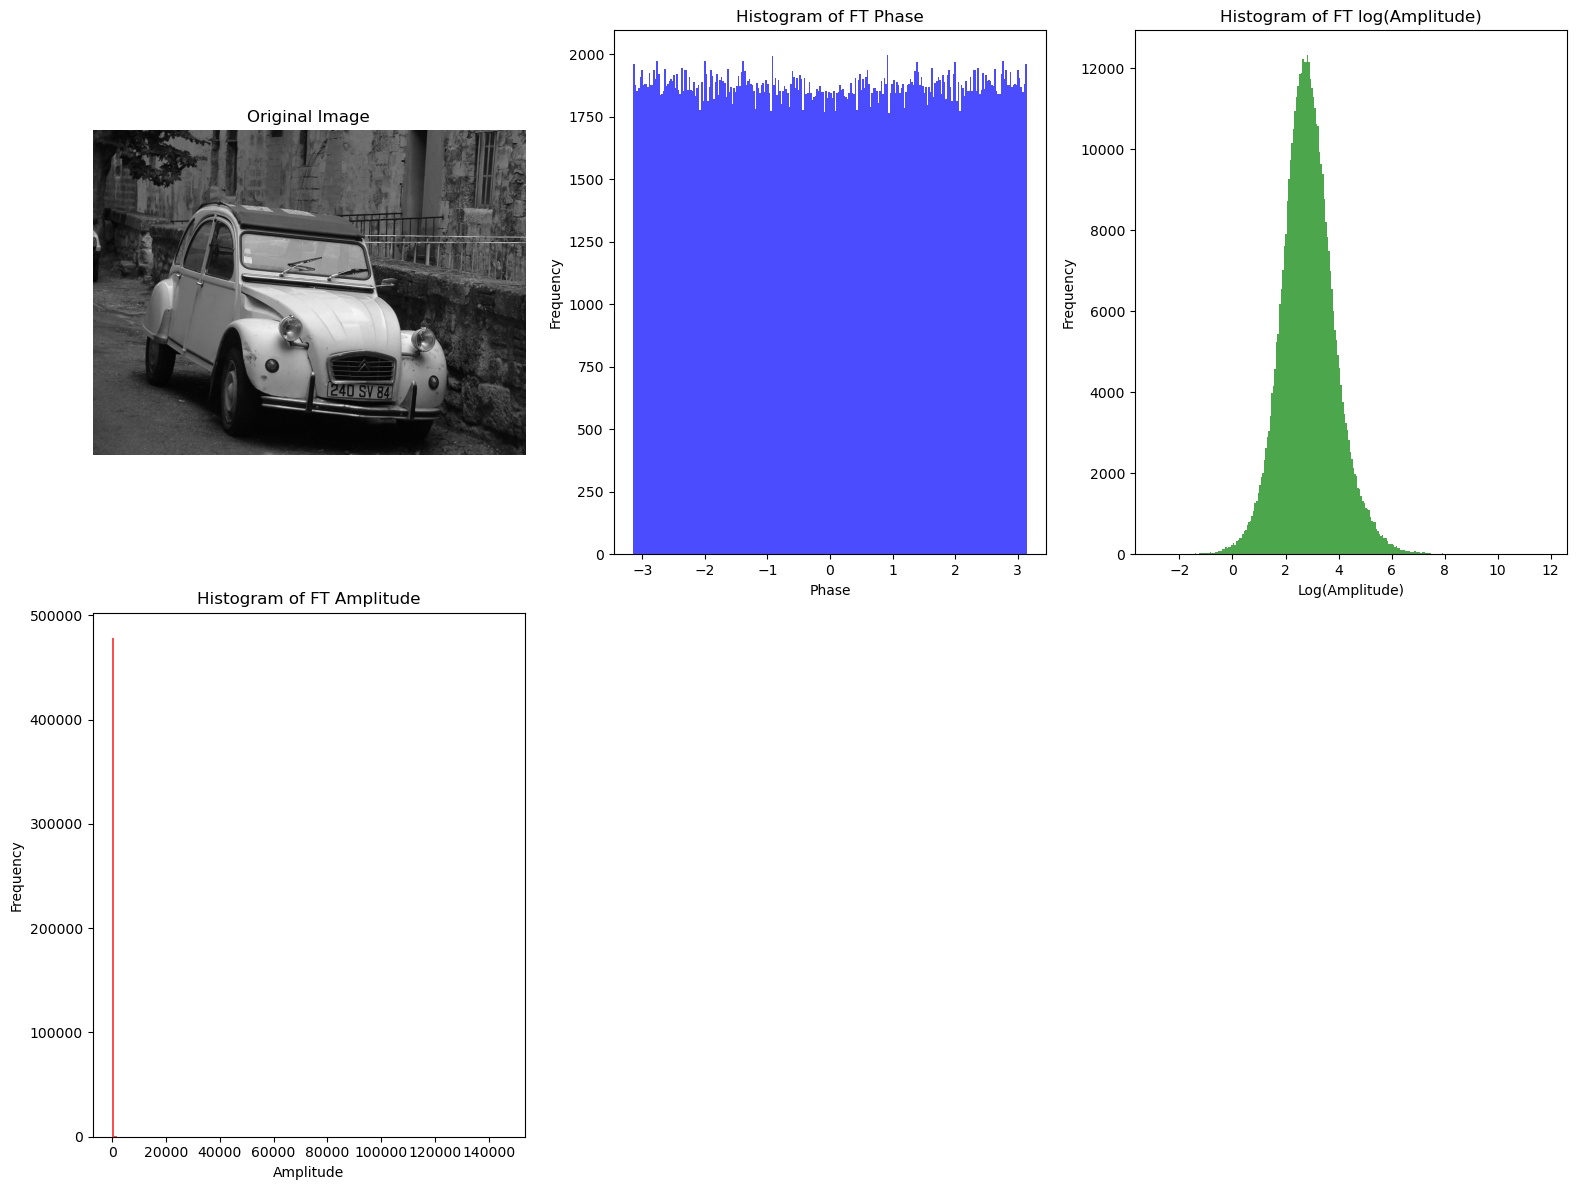

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

ft_img = np.fft.fft2(img)


# Plotting the images side by side
plt.figure(figsize=(16, 12))  # Set the figure size (width, height)

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')  # Remove axis

# Histogram of the FT phase
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 3
plt.hist(np.angle(ft_img).ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram of FT Phase')
plt.xlabel('Phase')
plt.ylabel('Frequency')

# Histogram of the FT log amplitude
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 4
plt.hist(np.log(np.abs(ft_img)).ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histogram of FT log(Amplitude)')
plt.xlabel('Log(Amplitude)')
plt.ylabel('Frequency')

# Histogram of the FT amplitude
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 5
plt.hist(np.abs(ft_img).ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histogram of FT Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

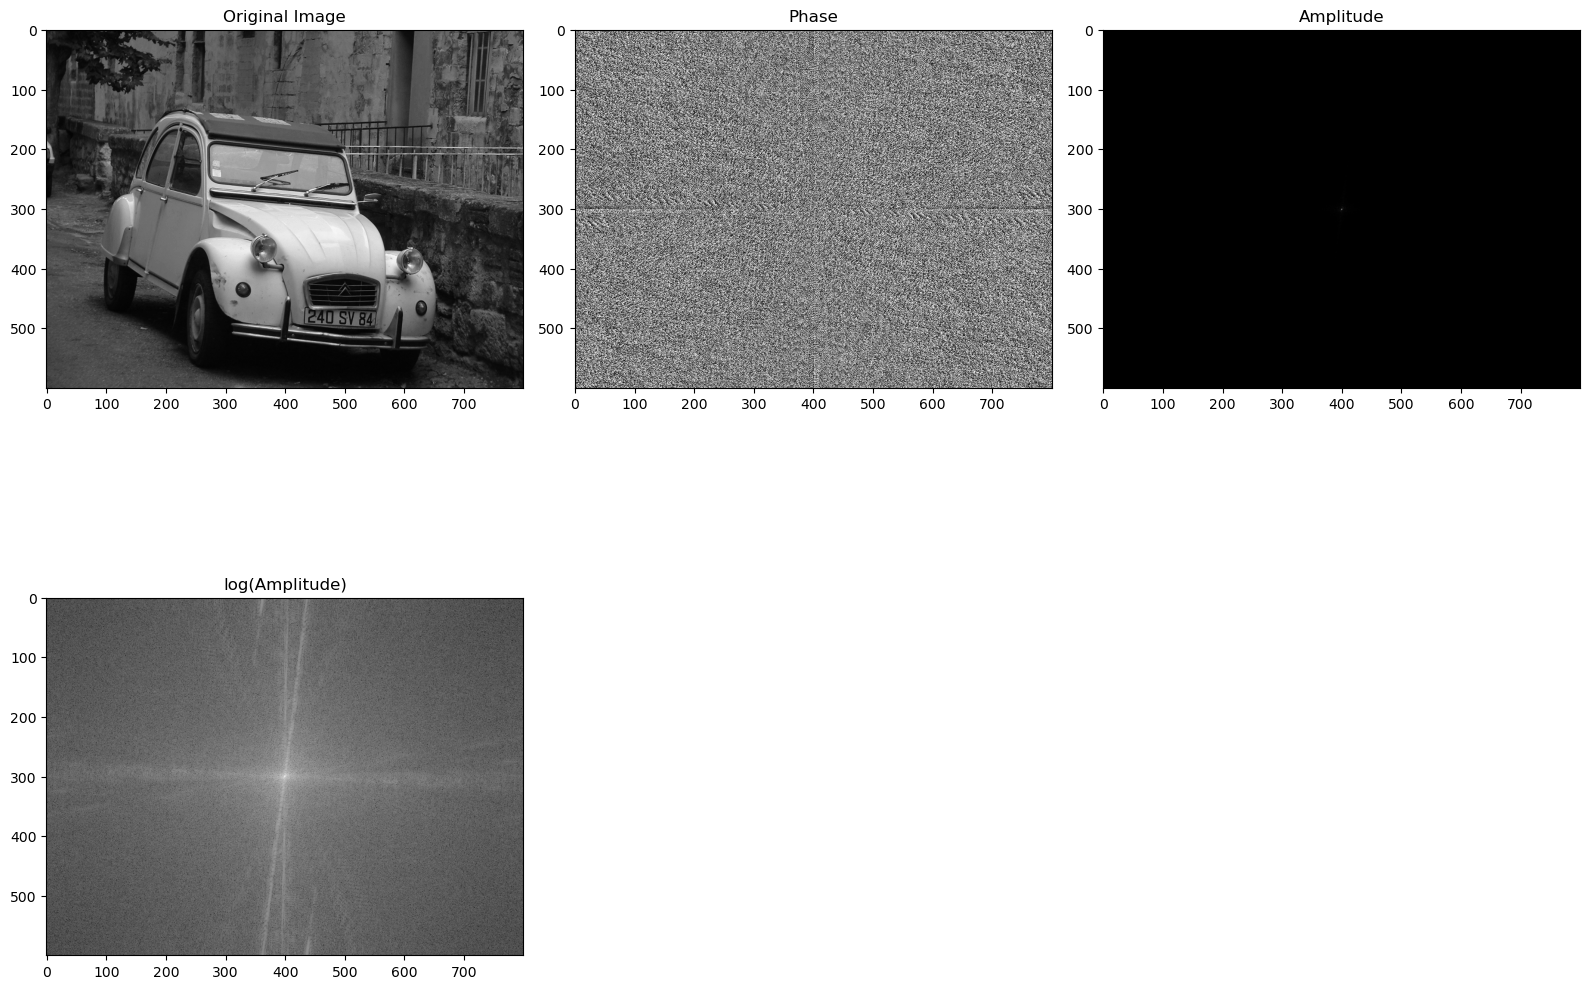

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

ft_img =np.fft.fftshift(np.fft.fft2(img))


plt.figure(figsize=(16, 12))  

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')

# Histogram of the FT phase
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
plt.imshow(np.angle(ft_img), cmap="gray")
plt.title('Phase')

# Histogram of the FT amplitude
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
plt.imshow(np.abs(ft_img), cmap="gray")
plt.title('Amplitude')

# Histogram of the FT log(amplitude)
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 3
plt.imshow(np.log(np.abs(ft_img)), cmap="gray")
plt.title('log(Amplitude)')

# Adjust layout
plt.tight_layout() 
plt.show()

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

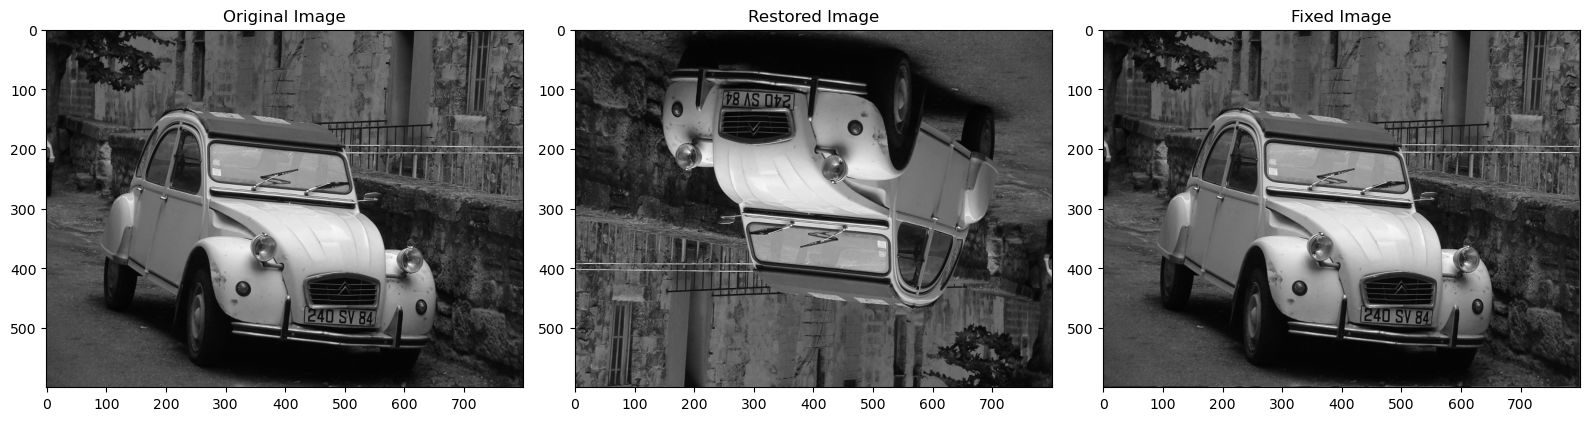

In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def restore_img(img):
    img = np.fft.fft2(img).real
    img = np.flip(img, axis=0)
    img = np.flip(img, axis=1)
    return img

img = plt.imread('images/dolly.png')
ft_img = np.fft.fft2(img)
fixed_img_1  = np.fft.fft2(ft_img)
fixed_img_2  = restore_img(ft_img)

plt.figure(figsize=(16, 12))  

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')

# Restored image
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
plt.imshow(fixed_img_1.real, cmap="gray")
plt.title('Restored Image')

# Fixed image
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
plt.imshow(fixed_img_2, cmap="gray")
plt.title('Fixed Image')

# Adjust layout
plt.tight_layout() 
plt.show()

F(F(f(x)))=f(−x)

Two fourier transforms results in a flipped image.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

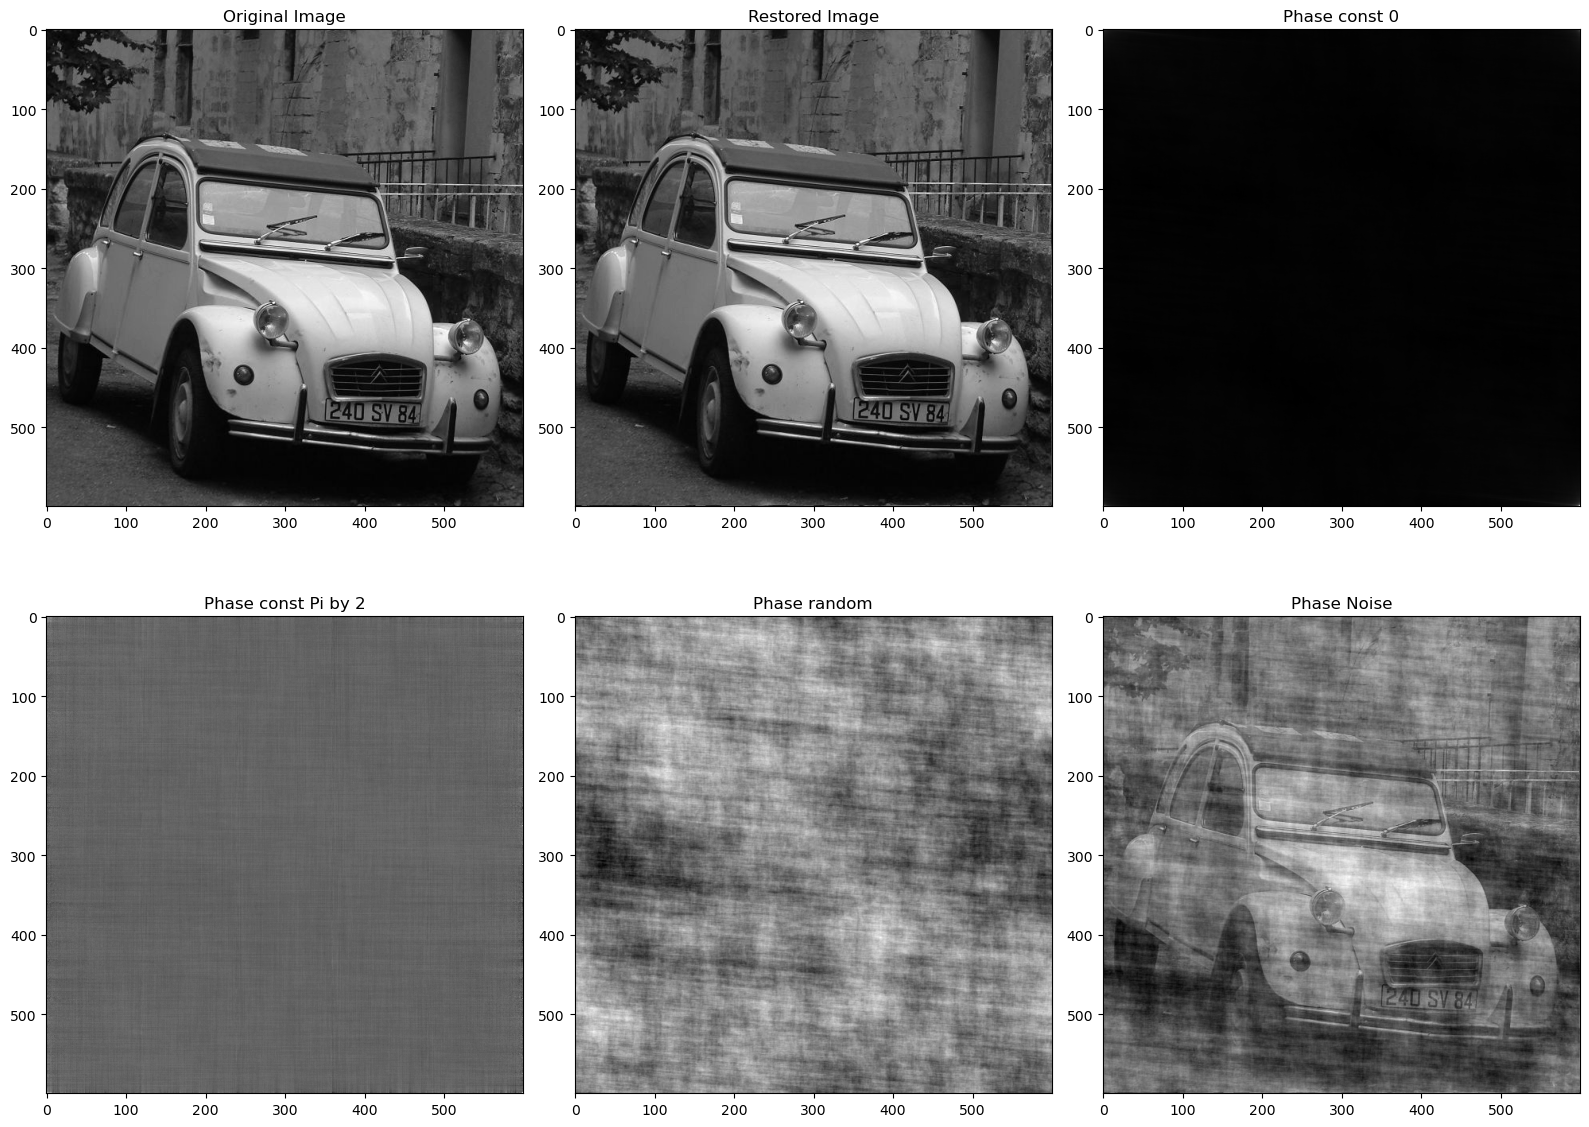

In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')
ft_img = np.fft.fft2(img)
fixed_img = restore_img(ft_img)

img_phase_0 = np.abs(ft_img) * np.exp(1j * 0)
img_phase_0 =  restore_img(img_phase_0)

img_phase_pi_by_2 = np.abs(ft_img) * np.exp(1j * np.pi/2.0)
img_phase_pi_by_2 =  restore_img(img_phase_pi_by_2)

phase = np.angle(ft_img)

random_phase_shift = np.random.uniform(-np.pi, np.pi, phase.shape)
random_phase_shift = phase+random_phase_shift
img_phase_random = np.abs(ft_img) * np.exp(1j * random_phase_shift)
img_phase_random =  restore_img(img_phase_random)

phase_translation = np.full(phase.shape,np.pi/2.0)
phase_translation = phase+phase_translation
img_phase_translation = np.abs(ft_img) * np.exp(1j * phase_translation)
img_phase_translation =  restore_img(img_phase_translation)

total_elements = phase.size
noise_factor = 0.3
num_noise_elements = int(total_elements * noise_factor)
noise_indices = np.random.choice(total_elements, num_noise_elements, replace=False)
random_noise = np.random.uniform(-np.pi, np.pi, num_noise_elements)
phase_flat = phase.flatten()
phase_flat[noise_indices] += random_noise
noisy_phase = phase_flat.reshape(phase.shape)
img_noisy_phase = np.abs(ft_img) * np.exp(1j * noisy_phase)
img_noisy_phase = restore_img(img_noisy_phase)


plt.figure(figsize=(16, 12))  

# Original image
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, position 1
plt.imshow(img, cmap="gray")
plt.title('Original Image')

# Restored image
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, position 2
plt.imshow(fixed_img, cmap="gray")
plt.title('Restored Image')

# Fixed image
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, position 3
plt.imshow(img_phase_0, cmap="gray")
plt.title('Phase const 0')

# Fixed image
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, position 4
plt.imshow(img_phase_pi_by_2, cmap="gray")
plt.title('Phase const Pi by 2')

# Fixed image
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, position 5
plt.imshow(img_phase_random, cmap="gray")
plt.title('Phase random')

# Translation image
plt.subplot(2, 3, 6)  # 2 rows, 3 columns, position 5
plt.imshow(img_noisy_phase, cmap="gray")
plt.title('Phase Noise')

# Adjust layout
plt.tight_layout() 
plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


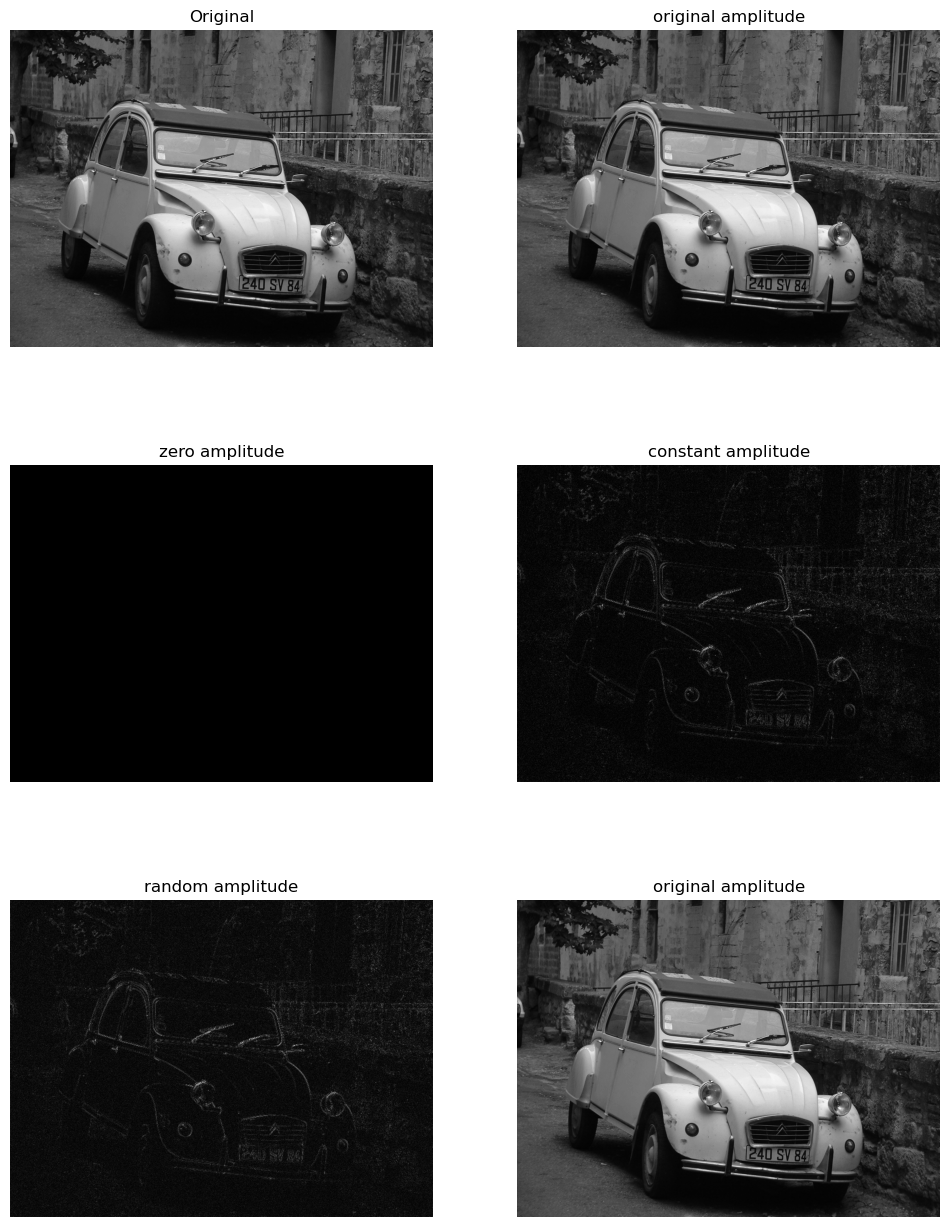

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

The Fourier transform is a mathematical technique used to analyze signals (such as images) by decomposing them into their constituent frequencies. In the context of images, rather than viewing the image in the typical spatial domain (where pixels represent the image directly), the Fourier transform allows us to represent the image in terms of frequencies.

The frequency space is a domain where the image is represented by the frequencies of the underlying waves that make up the image.

Point in frequency space represents - amplitude and phase

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

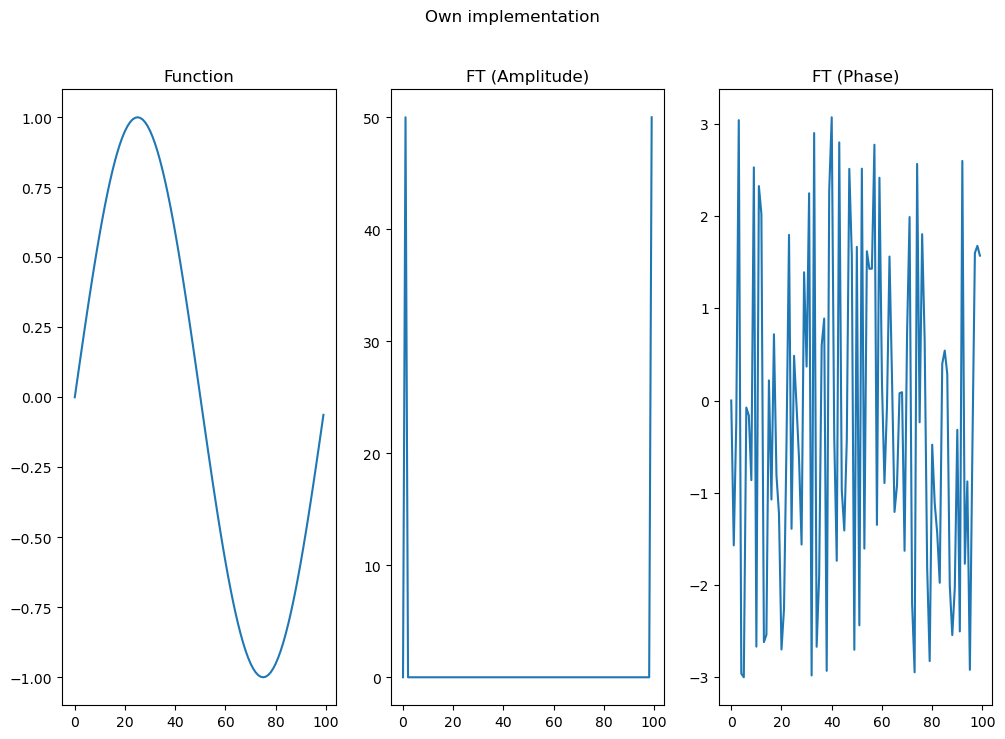

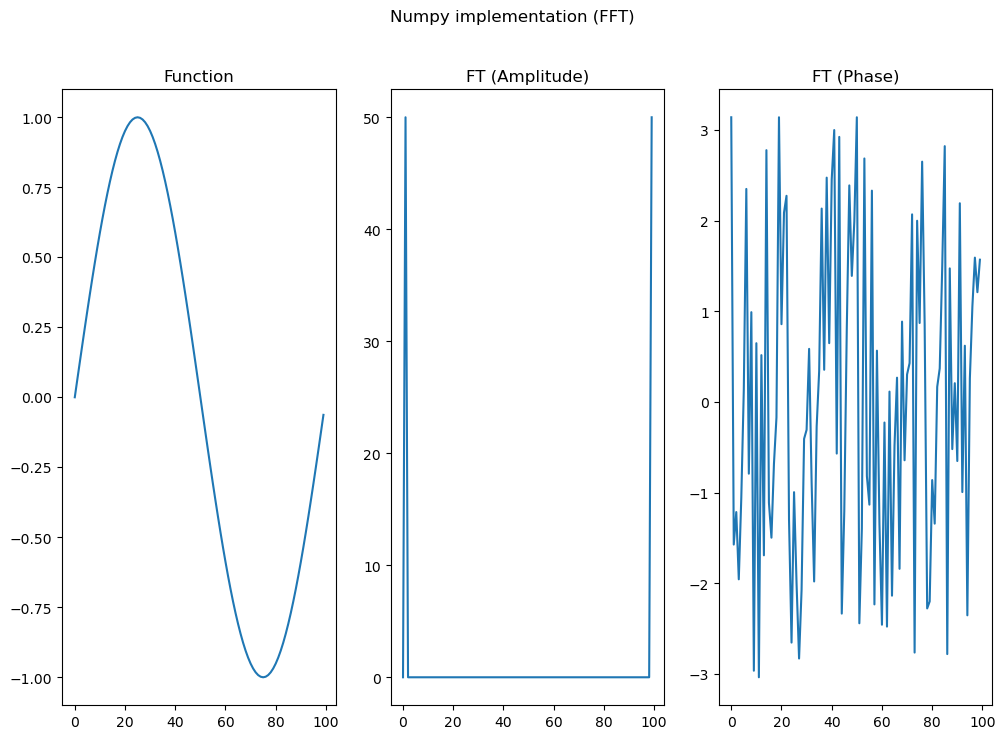

In [92]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    N = len(func)
    ft = np.zeros(N, dtype=complex)

    for idx in range(N):
        ft[idx] = np.sum(func * np.exp(-2j * np.pi * idx * np.arange(N) / N))
    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

C:\Users\shubh\AppData\Local\Temp\ipykernel_39092\2980551745.py:53: RuntimeWarning: divide by zero encountered in log
  plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
C:\Users\shubh\AppData\Local\Temp\ipykernel_39092\2980551745.py:57: RuntimeWarning: divide by zero encountered in log
  plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')


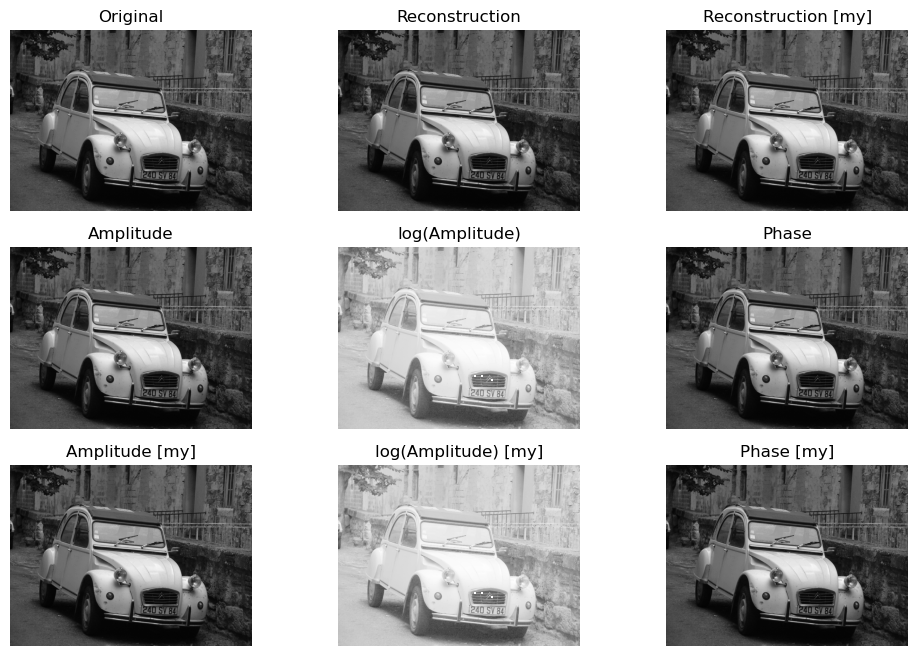

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """

    M, N = img.shape  # Get the dimensions of the image
    ft = np.zeros((M, N), dtype=complex)  # Initialize the result as a complex array

    # Perform the DFT manually for 2D
    for u in range(M):
        for v in range(N):
            # Initialize the frequency component F(u, v)
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    # Apply the 2D Fourier transform formula
                    exponent = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += img[x, y] * np.exp(exponent)
            ft[u, v] = sum_val

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

amplitude = img
phase = img
restore = img
my_amplitude = img
my_phase = img
my_restore = img

plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

The **Fourier transform** of the **convolution** of two functions is equal to the pointwise product of their individual **Fourier transforms**.



**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

YOUR ANSWER HERE

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


YOUR ANSWER HERE

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

YOUR ANSWER HERE